In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import scipy.stats as stats

Loading of dataset and cleaning data

In [2]:
df = pd.read_csv("/content/drive/MyDrive/cars_ds_final.csv",index_col = 0)

In [3]:
df.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
Model_Count = df['Model'].value_counts()

In [5]:
df['car'] = df['Make'] + '-' + df['Model']
df['car']

0           Tata-Nano Genx
1           Tata-Nano Genx
2           Tata-Nano Genx
3           Tata-Nano Genx
4           Tata-Nano Genx
               ...        
1271            Honda-City
1272            Honda-City
1273            Honda-City
1274            Honda-City
1275    Mitsubishi-Montero
Name: car, Length: 1276, dtype: object

In [6]:
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace(',','',regex=False)

In [7]:
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].astype(int)

Univariate Analysis

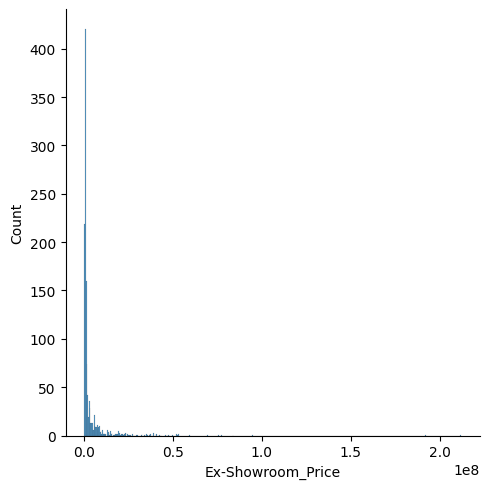

In [8]:
sns.displot(df['Ex-Showroom_Price'])

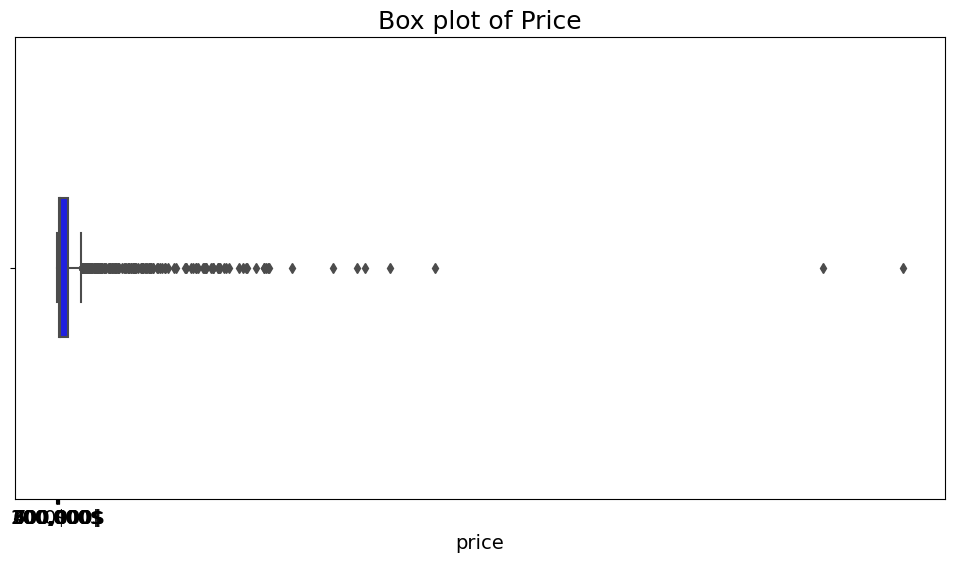

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Ex-Showroom_Price',width=.3,color='blue',)
plt.title('Box plot of Price',fontsize=18)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14)
plt.xlabel('price',fontsize=14);

Seems like there is a lot of varaince in price we can check that by plotting a box plot¶

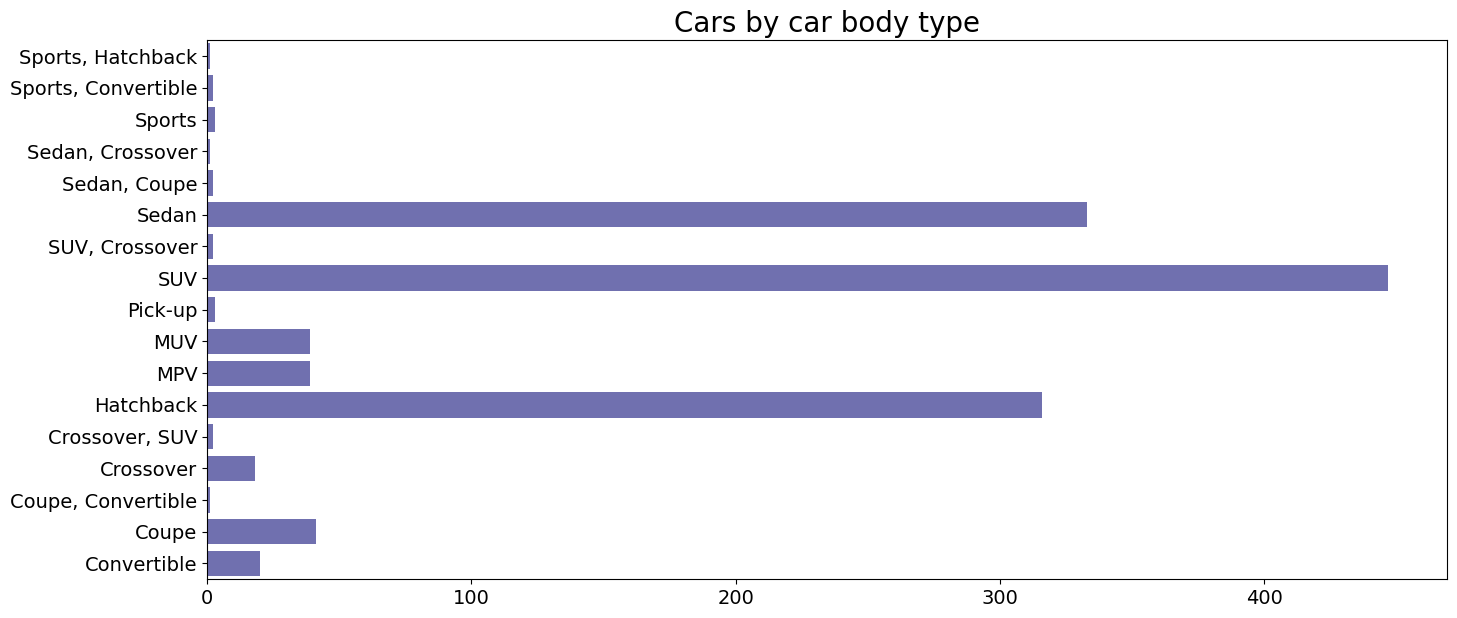

In [22]:
df_sorted = df.sort_values(by='Body_Type', ascending=False)
plt.figure(figsize=(16, 7))
sns.countplot(data=df_sorted, y='Body_Type',alpha=.6,color='darkblue')
plt.title('Cars by car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

SUV's Sedans and hatchbacks seems to be the dominating car types

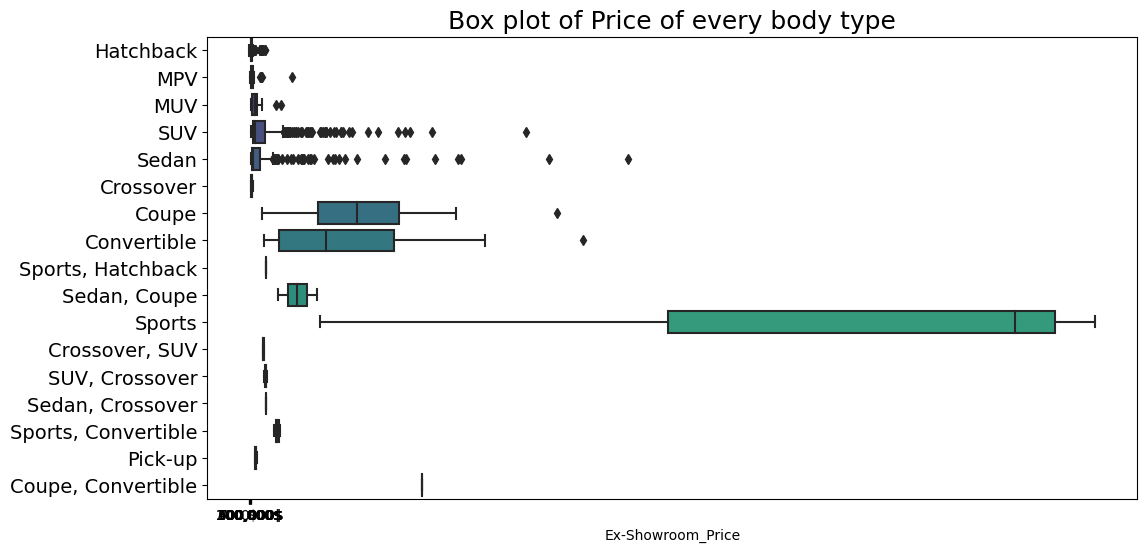

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Ex-Showroom_Price', y='Body_Type', palette='viridis')
plt.title('Box plot of Price of every body type',fontsize=18)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=10);

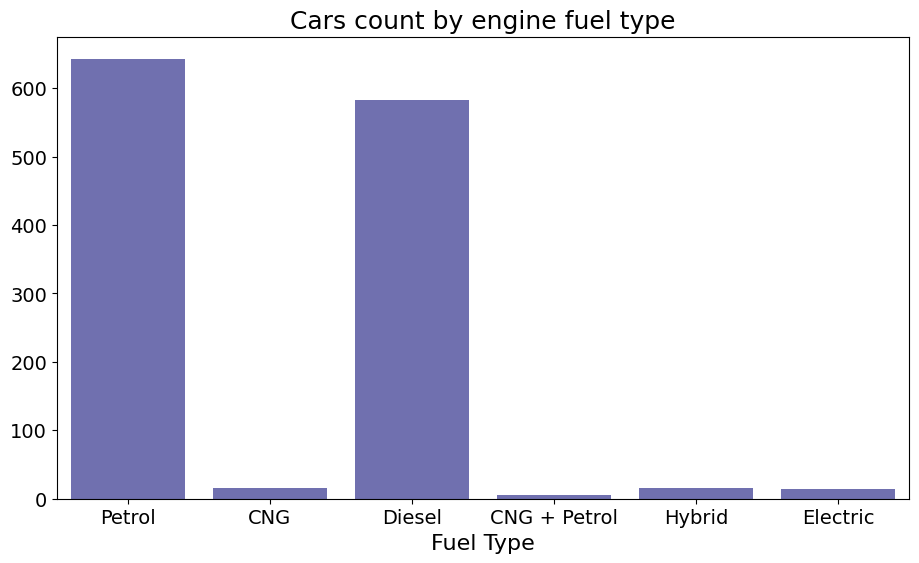

In [ ]:
plt.figure(figsize=(11,6))
sns.countplot(data=df, x='Fuel_Type',alpha=.6, color='darkblue')
plt.title('Cars count by engine fuel type',fontsize=18)
plt.xlabel('Fuel Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('');

In [ ]:
df.describe()

,Ex-Showroom_Price,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
count,1.276000e+03,1210.000000,1174.000000,1272.000000,1270.000000,1141.000000,29.000000
mean,4.596538e+06,4.380992,3.977853,4.550314,5.270079,3.787029,1.793103
std,1.214735e+07,1.660957,0.833763,0.747816,1.145231,2.522399,0.773642
min,2.364470e+05,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,7.438760e+05,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000
50%,1.060064e+06,4.000000,4.000000,5.000000,5.000000,2.000000,2.000000
75%,2.979828e+06,4.000000,4.000000,5.000000,5.000000,6.000000,2.000000
max,2.121554e+08,16.000000,16.000000,5.000000,16.000000,14.000000,3.000000


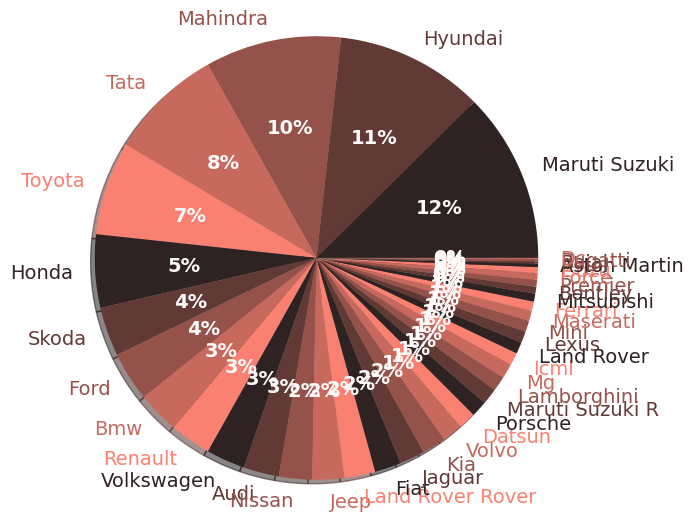

In [ ]:
count = df['Make'].value_counts()
count = count.reset_index().rename(columns={'Make':'Count','index':'Make'})
colors = sns.set_palette('dark:salmon',5)
patches,text, pcts= plt.pie(x='Count',labels='Make',autopct='%1.0f%%',data=count,colors=colors,radius=1.5,shadow=True,
                    textprops={'fontsize': 14})
for i, patch in enumerate(patches):
    text[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='snow',fontweight='bold')
plt.show()

In [ ]:
df.sample(6)

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range,car
202,Toyota,Platinum Etios,Gx,689600,1496 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Toyota-Platinum Etios
617,Tata,Tigor Ev,Xm+,960868,NaN,NaN,NaN,FWD (Front Wheel Drive),NaN,BS VI,...,NaN,M1 Category,NaN,NaN,NaN,NaN,NaN,"21.5 kWh,Battery Placed Under Rear Seats",213 km/full charge,Tata-Tigor Ev
547,Hyundai,I20 Active,1.2 S,774035,1197 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hyundai-I20 Active
175,Volkswagen,Ameo,Trendline 1.5L Tdi,711500,1498 cc,NaN,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Volkswagen-Ameo
174,Ford,Freestyle,1.5L Tdci Trend Plus,745900,1498 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ford-Freestyle
203,Toyota,Platinum Etios,Gxd,799600,1364 cc,4.0,2.0,FWD (Front Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Toyota-Platinum Etios


In [ ]:
df = df[~df.ARAI_Certified_Mileage.isnull()]
df = df[~df.Make.isnull()]
df = df[~df.Width.isnull()]
df = df[~df.Cylinders.isnull()]
df = df[~df.Wheelbase.isnull()]
df = df[~df['Fuel_Tank_Capacity'].isnull()]
df = df[~df['Seating_Capacity'].isnull()]
df = df[~df['Torque'].isnull()]
df['Height'] = df['Height'].str.replace(' mm','',regex=False).astype(float)
df['Length'] = df['Length'].str.replace(' mm','',regex=False).astype(float)
df['Width'] = df['Width'].str.replace(' mm','',regex=False).astype(float)
df['Wheelbase'] = df['Wheelbase'].str.replace(' mm','',regex=False).astype(float)
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.replace(' litres','',regex=False).astype(float)
df['Displacement'] = df['Displacement'].str.replace(' cc','',regex=False)
df.loc[df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
df.loc[df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace(' km/litre','',regex=False).astype(float)
df.Number_of_Airbags.fillna(0,inplace= True)
df['price'] = df['Ex-Showroom_Price'] * 0.014
df.drop(columns='Ex-Showroom_Price', inplace= True)
df.price = df.price.astype(int)
HP = df.Power.str.extract(r'(\d{1,4}).*').astype(int) * 0.98632
HP = HP.apply(lambda x: round(x,2))
TQ = df.Torque.str.extract(r'(\d{1,4}).*').astype(int)
TQ = TQ.apply(lambda x: round(x,2))
df.Torque = TQ
df.Power = HP
df.Doors = df.Doors.astype(int)
df.Seating_Capacity = df.Seating_Capacity.astype(int)
df.Number_of_Airbags = df.Number_of_Airbags.astype(int)
df.Displacement = df.Displacement.astype(int)
df.Cylinders = df.Cylinders.astype(int)

In [ ]:
df.head()

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,...,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range,car,price
0,Tata,Nano Genx,Xt,624,2,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tata-Nano Genx,4097
1,Tata,Nano Genx,Xe,624,2,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tata-Nano Genx,3310
3,Tata,Nano Genx,Xta,624,2,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tata-Nano Genx,4686
4,Tata,Nano Genx,Xm,624,2,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tata-Nano Genx,3811
5,Tata,Nano Genx,Xma,624,2,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tata-Nano Genx,4407


Bivariate Analysis




Now we check car by engine size

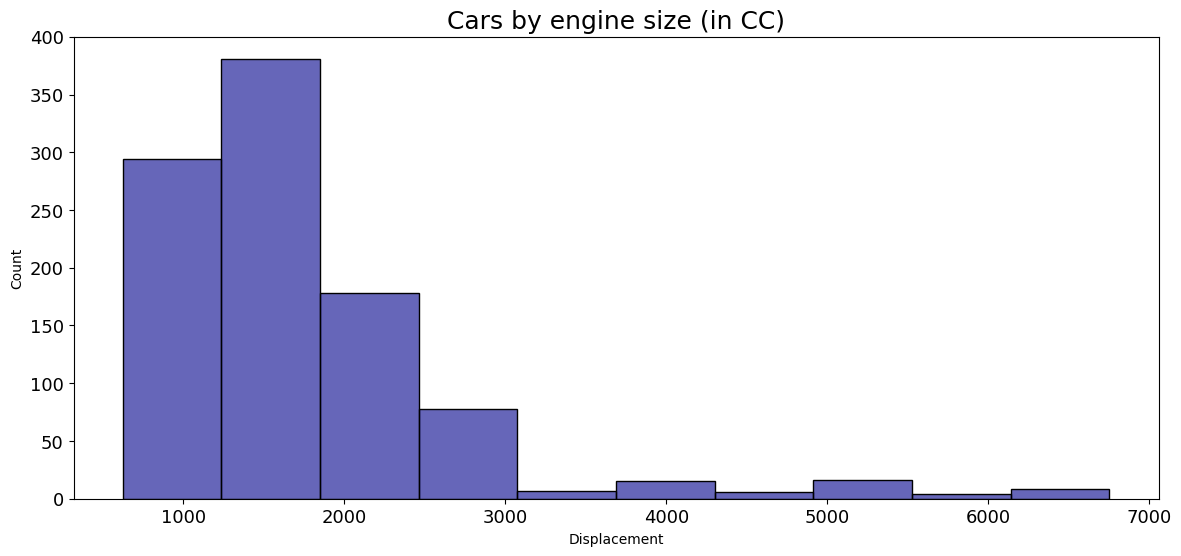

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='Displacement',alpha=.6, color='darkblue',bins=10)
plt.title('Cars by engine size (in CC)',fontsize=18)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

Seems like most of cars have engine size in the 1000:2000cc range

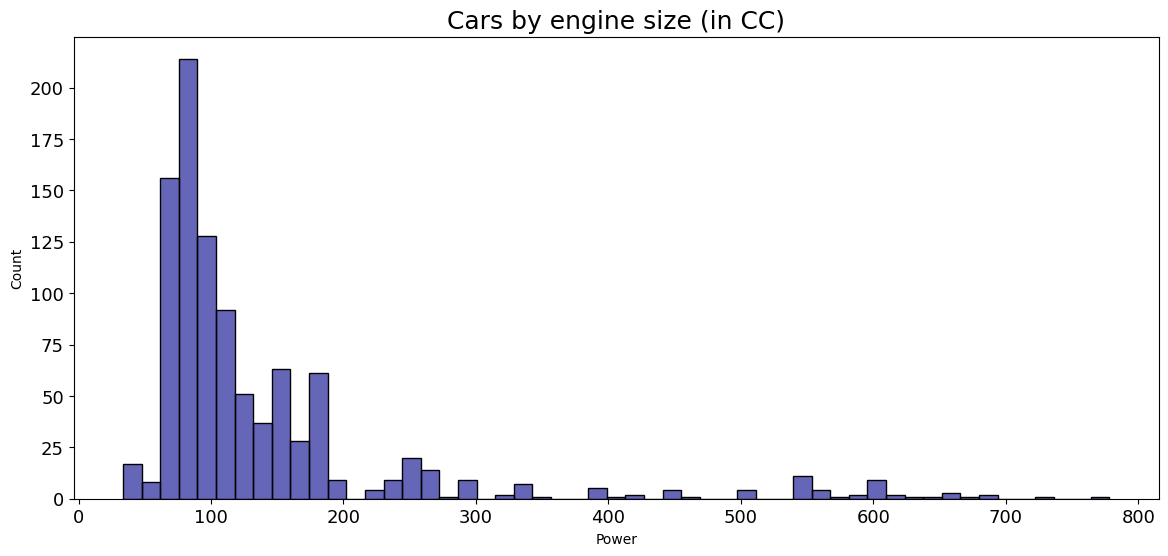

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='Power',alpha=.6, color='darkblue')
plt.title('Cars by engine size (in CC)',fontsize=18);
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

Now we check the relation horsepower and price considering diffreent body type

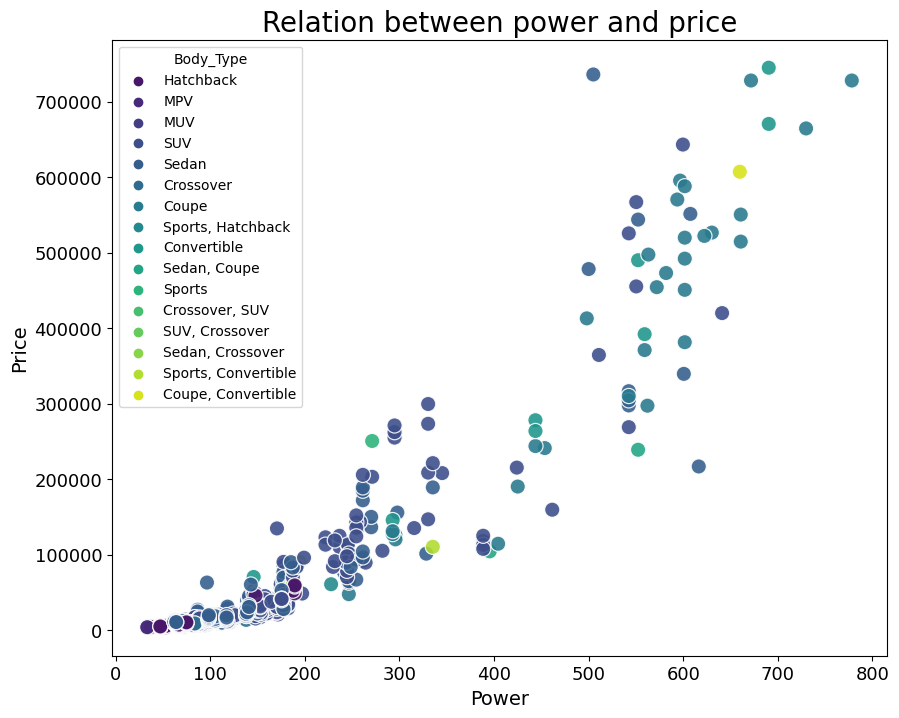

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Power', y='price',hue='Body_Type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('Power',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.title('Relation between power and price',fontsize=20);

Horsepower of car seems to be highly related to car price but car body type seems a little bit blurry

We can also check the overall correlation of between variables and each other

<ipython-input-130-41213c43676a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2%')


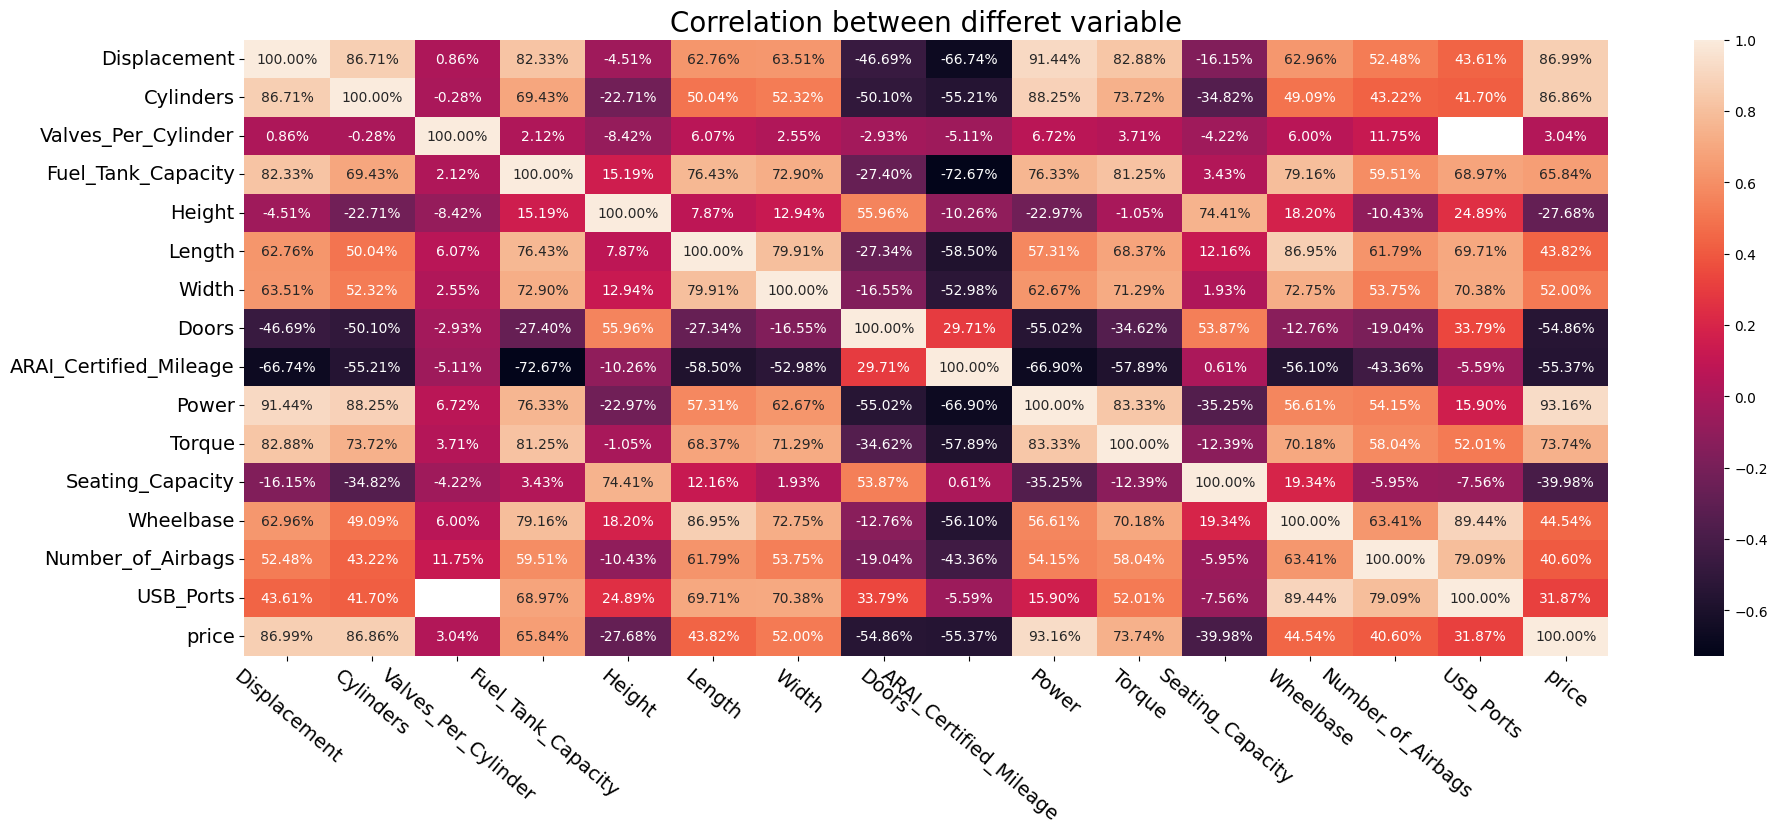

In [ ]:
plt.figure(figsize=(22,8))
sns.heatmap(df.corr(), annot=True, fmt='.2%')
plt.title('Correlation between differet variable',fontsize=20)
plt.xticks(fontsize=14, rotation=320)
plt.yticks(fontsize=14);

 3D scatter plot to check for obvious clusters with main features as price horsepower and mileage¶

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='Power', z='price', y='City_Mileage',color='Make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();